# Regresja liniowa w scikit-learn

### Regresja liniowa w R2

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


'1.8.0'

### Wygenerowanie danych

In [2]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [3]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [4]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

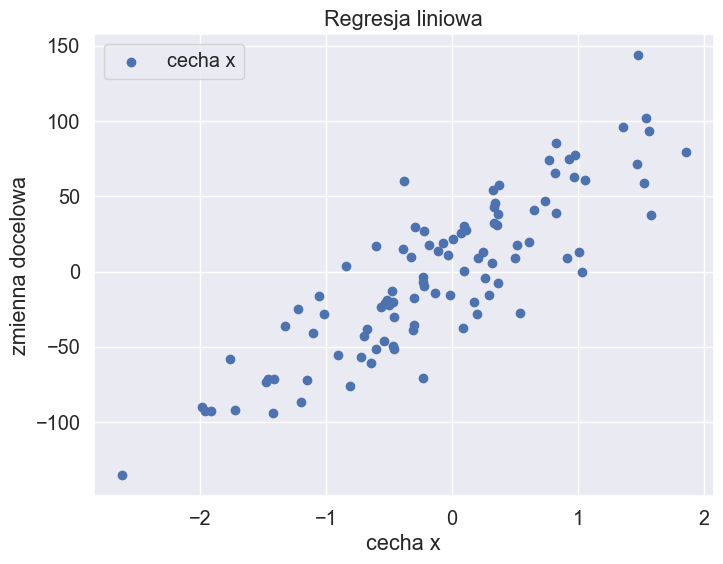

In [5]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.plot();

#### Wzór na regresję liniową w R2

$Y = w_0 + w_1X_1$

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# metoda fit() dopasowuje model liniowy do danych
regressor.fit(data, target)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# metoda score() dokonuje oceny modelu na przekazanych danych (wynik R2 score)
regressor.score(data, target)

0.7426670084336404

In [8]:
# metoda predict() dokonuje predykcji na podstawie modelu
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

### Wizualizacja

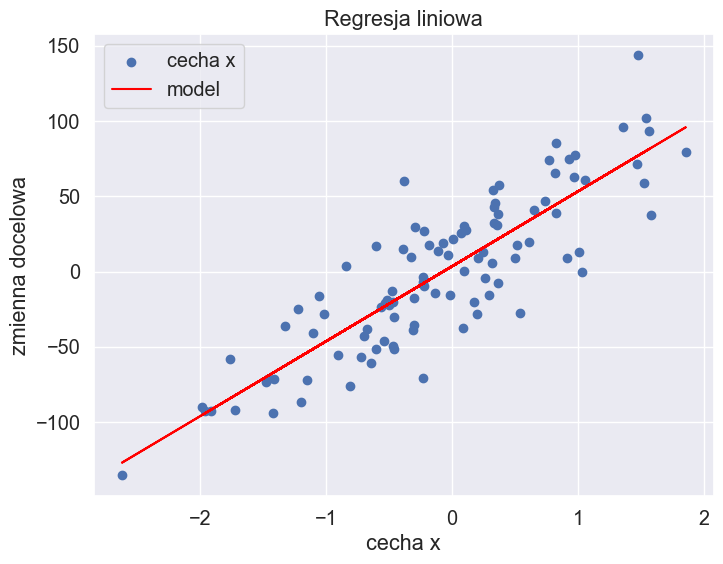

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

In [12]:
regressor.predict([[1.5]])

array([78.24])

In [13]:
regressor.score(data, target)

0.7426670084336404

In [14]:
regressor.coef_

array([49.83])

In [15]:
regressor.intercept_

np.float64(3.4953459615809193)

### Współczynnik $R^{2}$ 
Współczynnik $R^2$ jest zdefiniowany jako $1 - \frac{u}{v}$, gdzie $u$ jest określone wzorem 
```
((y_true - y_pred) ** 2).sum()
``` 
oraz $v$ jako 
```
((y_true - y_true.mean()) ** 2).sum()
``` 
Czyli 
```
1 - (((y_true - y_pred) ** 2).sum()) / (((y_true - y_true.mean()) ** 2).sum())
```
Najlepszą możliwą wartością jest 1.0. $R^{2}$ może przyjmować wartość ujemną. Model, który przewiduje zawsze dla każdej próbki wartość oczekiwaną zmiennej docelowej ma współczynnik $R^2$ równy 0.

In [13]:
1 - (((target - y_pred) ** 2).sum()) / (((target - target.mean()) ** 2).sum())

0.7426670084336404

### <a name='5'></a> Końcowa postać modelu

$$Y = w_0 + w_1X_1$$
Postać modelu: $$Y = 3.495 + 49.83 \cdot X_1$$

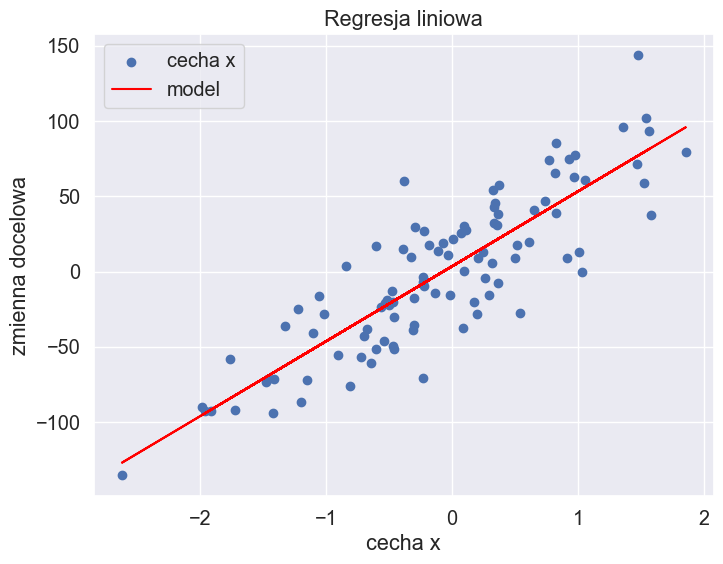

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

### Regresja z podziałem na zbiór treningowy oraz testowy

In [17]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

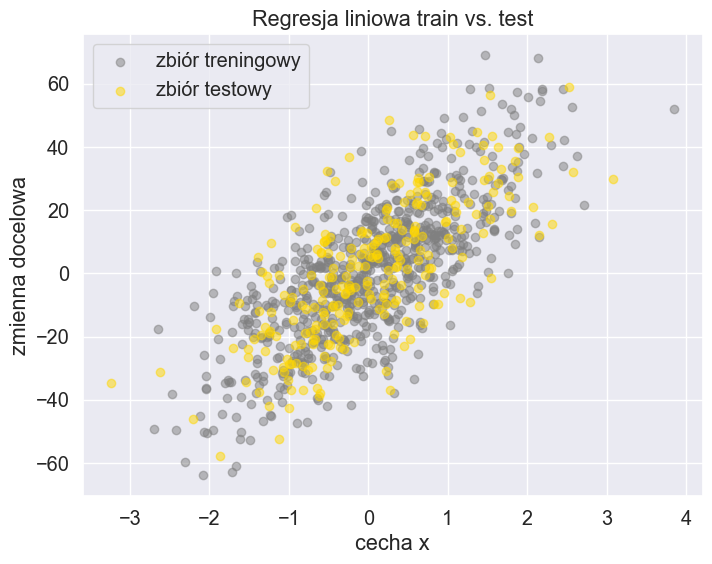

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
regressor.score(X_train, y_train)

0.5550440098049001

In [22]:
regressor.score(X_test, y_test)

0.5108438585354154

### Regresja liniowa - zbiór treningowy - wizualizacja

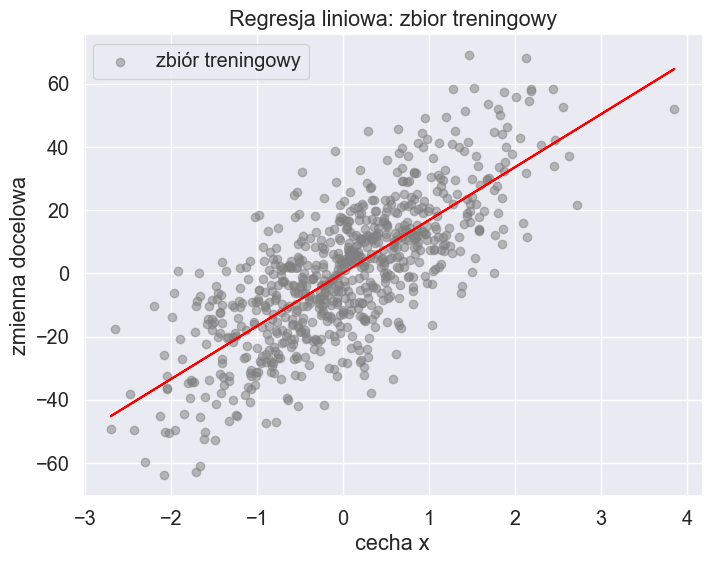

In [23]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot();

### Regresja liniowa - zbiór testowy - wizualizacja

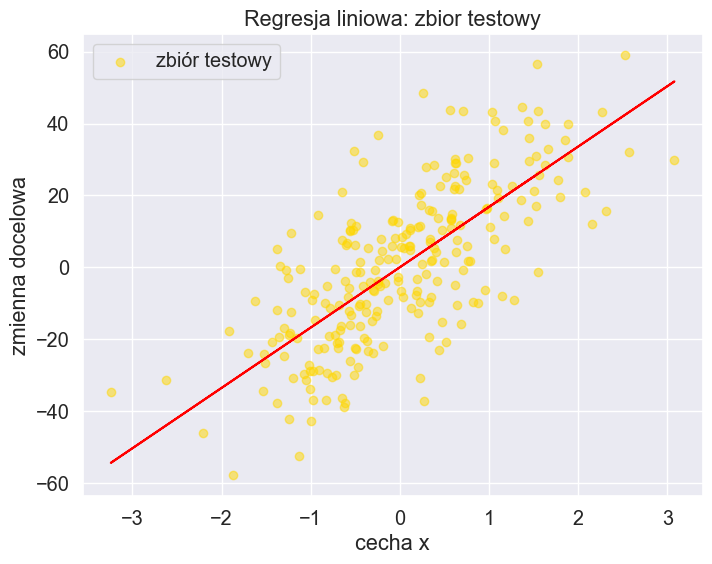

In [24]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot();

### Predykcja na podstawie modelu

In [25]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [26]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


Patrząc na wiersz 3, jest całkiem nieźle!

Ale patrząc na wiersz 5... :)

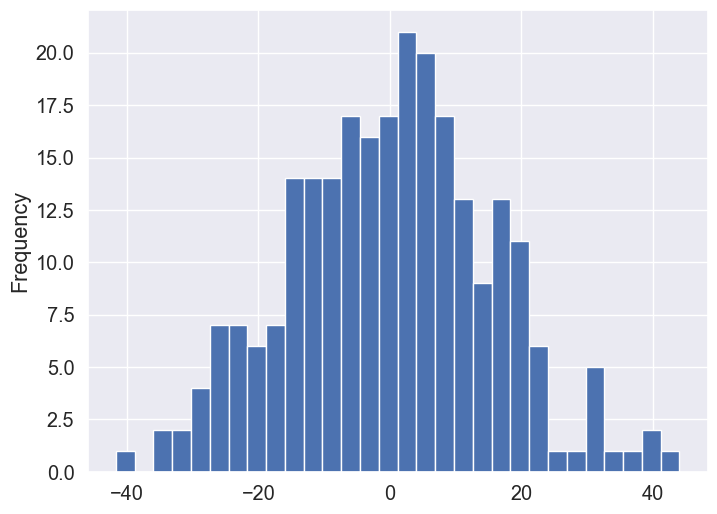

In [30]:
predictions['error'].plot(kind='hist', bins=30, figsize=(8, 6));

### Metryki - sposób oceny modeli (wszystkich błędów predkcji)

Oto najpopularniejsze metryki oceny modeli regresyjnych wraz z ich interpretacją:

1. **Średni błąd bezwzględny (Mean Absolute Error - MAE)**:
   - Interpretacja: Średnia wartość bezwzględna różnic między wartościami przewidywanymi a rzeczywistymi.
   - Zakres: [0, ∞), im niższa wartość, tym lepsze dopasowanie modelu.

2. **Średni kwadratowy błąd (Mean Squared Error - MSE)**:
   - Interpretacja: Średnia kwadratów różnic między wartościami przewidywanymi a rzeczywistymi.
   - Zakres: [0, ∞), im niższa wartość, tym lepsze dopasowanie modelu.

3. **Pierwiastek ze średniego kwadratu błędu (Root Mean Squared Error - RMSE)**:
   - Interpretacja: Pierwiastek kwadratowy ze średniego kwadratu różnic między wartościami przewidywanymi a rzeczywistymi.
   - Zakres: [0, ∞), im niższa wartość, tym lepsze dopasowanie modelu.

4. **Współczynnik determinacji (R-squared - R²)**:
   - Interpretacja: Miara proporcji wariancji zmiennej zależnej wyjaśnionej przez model.
   - Zakres: [0, 1], im wyższa wartość, tym lepsze dopasowanie modelu.
   - Wartość 1 oznacza idealne dopasowanie, 0 oznacza brak dopasowania.

5. **Skorygowany współczynnik determinacji (Adjusted R-squared)**:
   - Interpretacja: Miara proporcji wariancji zmiennej zależnej wyjaśnionej przez model, skorygowana o liczbę predyktorów.
   - Zakres: [0, 1], im wyższa wartość, tym lepsze dopasowanie modelu.
   - Uwzględnia kompromis między dopasowaniem a złożonością modelu.

6. **Błąd procentowy średniej bezwzględnej wartości (Mean Absolute Percentage Error - MAPE)**:
   - Interpretacja: Średni bezwzględny błąd procentowy między wartościami przewidywanymi a rzeczywistymi.
   - Zakres: [0, ∞), im niższa wartość, tym lepsze dopasowanie modelu.
   - Wyrażony jako procent średniej wartości rzeczywistej.

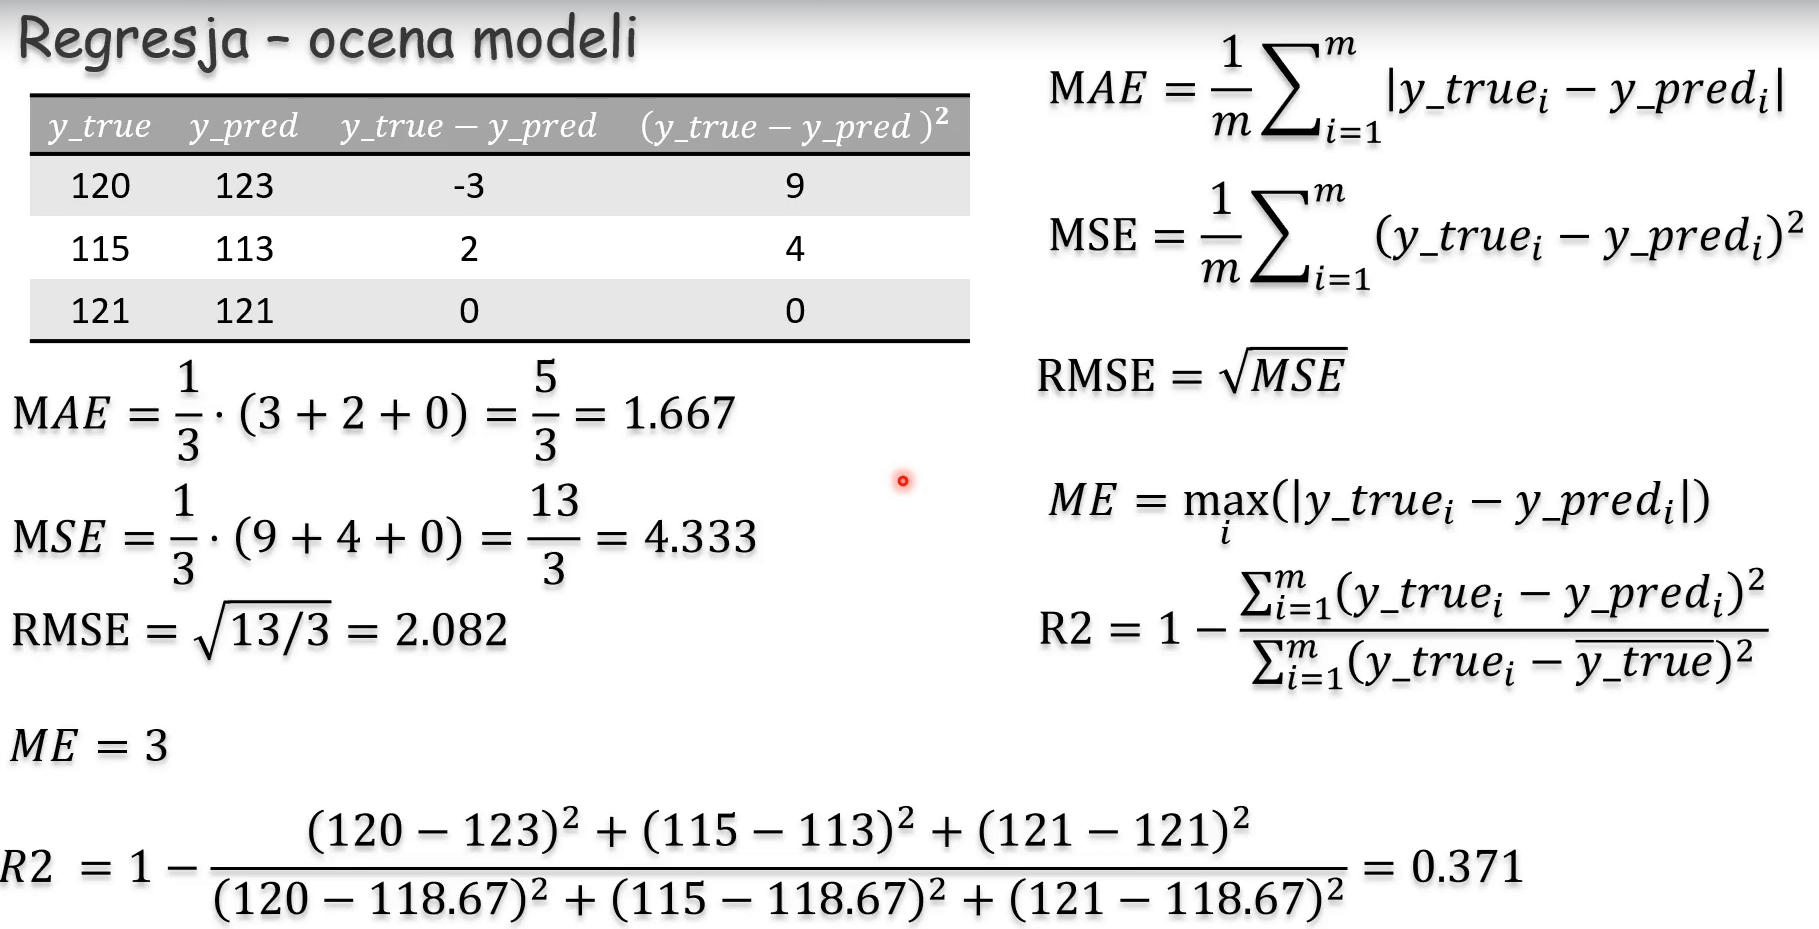

In [31]:
y_true = predictions.y_true
y_pred = predictions.y_pred

### Mean Absolute Error - Średni błąd bezwzględny
### $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{true} - y_{pred}|$$

In [34]:
def mean_absolute_error_custom(y_true, y_pred):
    return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error_custom(y_true, y_pred)

np.float64(12.280811195148154)

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true, y_pred)

12.280811195148154

### Mean Squared Error - MSE - Błąd średniokwadratowy
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^{2}$$

In [36]:
def mean_squared_error_custom(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error_custom(y_true, y_pred)

np.float64(236.18672577557993)

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

236.18672577557993

### Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego
### $$RMSE = \sqrt{MSE}$$

In [38]:
def root_mean_squared_error_custom(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error_custom(y_true, y_pred)

np.float64(15.368367700428694)

In [40]:
np.sqrt(mean_squared_error(y_true, y_pred))

np.float64(15.368367700428694)

###  R2 score - współczynnik determinacji
### $$R2\_score = 1 - \frac{\sum_{i=1}^{N}(y_{true} - y_{pred})^{2}}{\sum_{i=1}^{N}(y_{true} - \overline{y_{true}})^{2}}$$

In [41]:
def r2_score_custom(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_true.mean()) ** 2).sum()
    try:
        r2 = 1 - numerator / denominator
    except ZeroDivisionError:
        print('Dzielenie przez zero')
    return r2

r2_score_custom(y_true, y_pred)

np.float64(0.5108438585354154)

In [42]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.5108438585354154